In [ ]:
from torchvision.models.detection import maskrcnn_resnet50_fpn

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [ ]:
model = maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


In [ ]:
from pathlib import Path
from torchvision.utils import make_grid
from torchvision.io import read_image

In [ ]:
model_1_int = read_image(str(Path('assets') / 'model_4.jpg'))


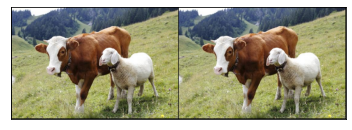

In [ ]:
grid = make_grid([model_1_int, model_1_int])
show(grid)

In [ ]:
from torchvision.transforms.functional import convert_image_dtype

In [ ]:
batch_int = torch.stack([model_1_int])
batch = convert_image_dtype(batch_int, dtype=torch.float)

In [ ]:
normalized_batch = F.normalize(batch, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
output = model(batch)

In [ ]:
dog1_output = output[0]
dog1_masks = dog1_output['masks']
print(f"shape = {dog1_masks.shape}, dtype = {dog1_masks.dtype}, "
      f"min = {dog1_masks.min()}, max = {dog1_masks.max()}")

shape = torch.Size([7, 1, 367, 550]), dtype = torch.float32, min = 0.0, max = 0.9998117089271545


In [ ]:
inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
inst_class_to_idx = {cls: idx for (idx, cls) in enumerate(inst_classes)}

print("For the first dog, the following instances were detected:")
print([inst_classes[label] for label in dog1_output['labels']])

For the first dog, the following instances were detected:
['sheep', 'cow', 'cow', 'sheep', 'cow', 'cow', 'sheep']


shape = torch.Size([7, 367, 550]), dtype = torch.bool


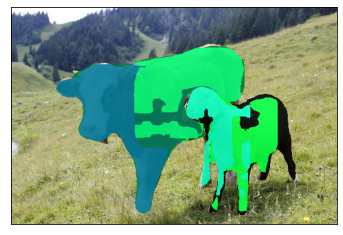

In [ ]:
from torchvision.utils import draw_segmentation_masks
proba_threshold = 0.5
model_1_bool_masks = dog1_output['masks'] > proba_threshold
print(f"shape = {dog1_bool_masks.shape}, dtype = {dog1_bool_masks.dtype}")

# There's an extra dimension (1) to the masks. We need to remove it
model_1_bool_masks = dog1_bool_masks.squeeze(1)

show(draw_segmentation_masks(model_1_int, model_1_bool_masks, alpha=0.9))